In [1]:
import random
import warnings

from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


Данные по классификации вина содержат информаю по 10 характеристикам, всего 15000 записей. Пропусков в данных нет.
2 характеристики (переменные): имеют числовое значение (непрерывное числовое значение), тип float64, 
8 характеристик (переменных): имеют числовое целочисленное значение, тип int64,
таргетная переменная (бинарный) - категориальный признак, имеет целочисленное значение int64.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,15000.0,1.502922e+06,289253.443471,1.000038e+06,1.252866e+06,1.505508e+06,1.755205e+06,1.999997e+06
Pregnancies,15000.0,3.224533e+00,3.391020,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
PlasmaGlucose,15000.0,1.078569e+02,31.981975,4.400000e+01,8.400000e+01,1.040000e+02,1.290000e+02,1.920000e+02
DiastolicBloodPressure,15000.0,7.122067e+01,16.758716,2.400000e+01,5.800000e+01,7.200000e+01,8.500000e+01,1.170000e+02
TricepsThickness,15000.0,2.881400e+01,14.555716,7.000000e+00,1.500000e+01,3.100000e+01,4.100000e+01,9.300000e+01
SerumInsulin,15000.0,1.378521e+02,133.068252,1.400000e+01,3.900000e+01,8.300000e+01,1.950000e+02,7.990000e+02
BMI,15000.0,3.150965e+01,9.759000,1.820051e+01,2.125989e+01,3.176794e+01,3.925969e+01,5.603463e+01
DiabetesPedigree,15000.0,3.989677e-01,0.377944,7.804379e-02,1.377433e-01,2.002971e-01,6.162851e-01,2.301594e+00
Age,15000.0,3.013773e+01,12.089703,2.100000e+01,2.200000e+01,2.400000e+01,3.500000e+01,7.700000e+01
Diabetic,15000.0,3.333333e-01,0.471420,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


Удалим ID пациента

In [5]:
df.drop('PatientID', axis=1, inplace=True)

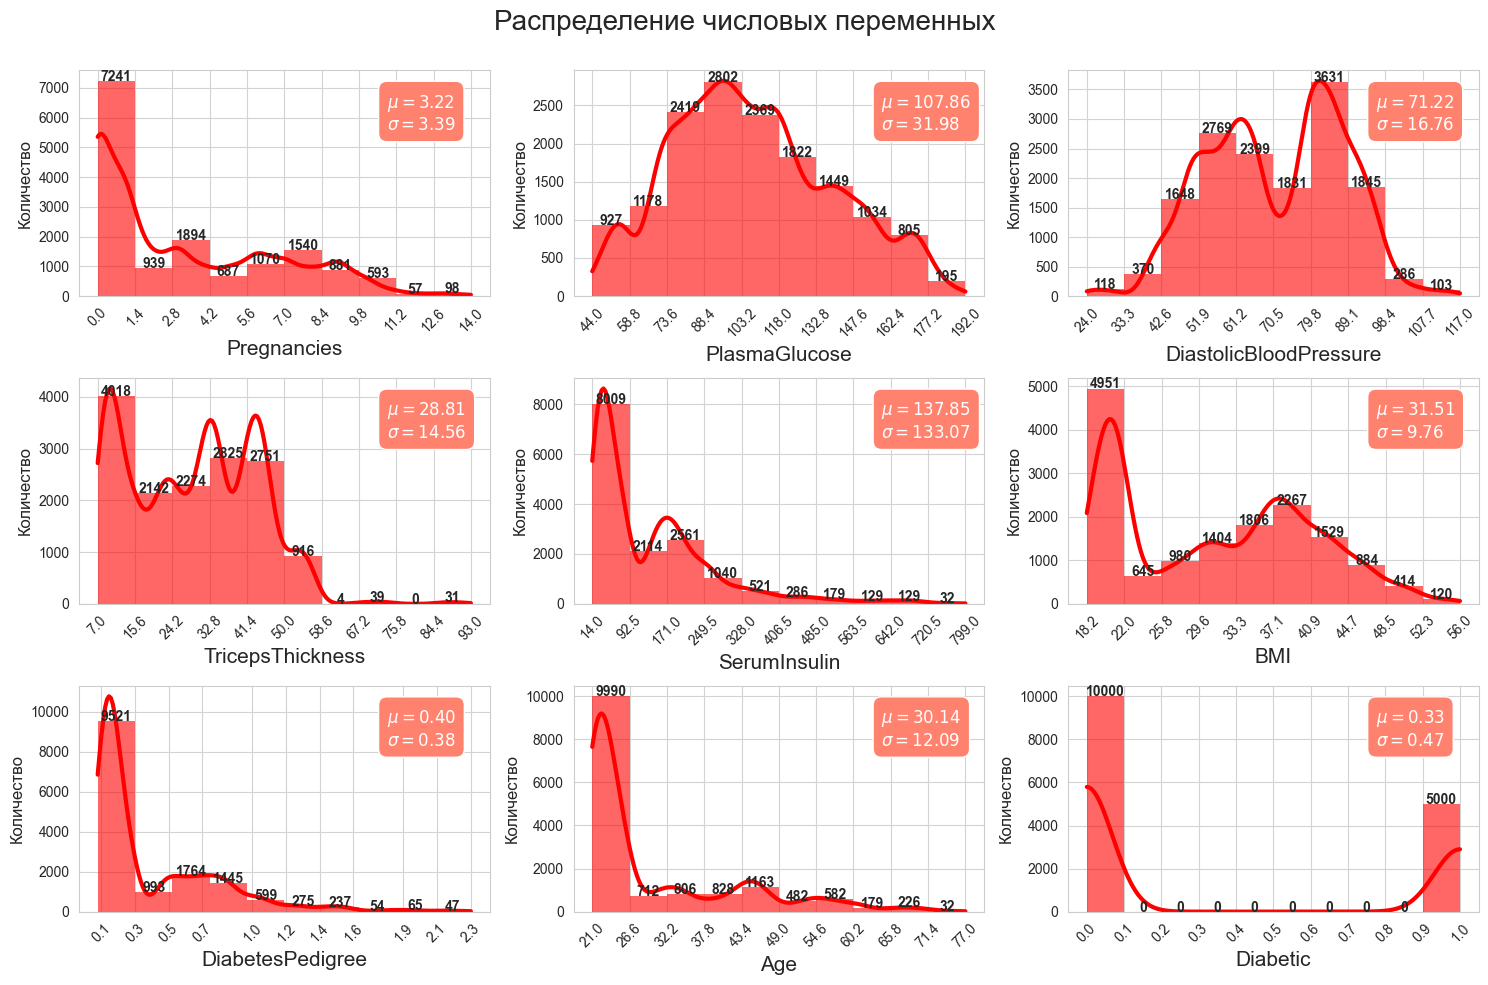

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df[col],
                                     range=(df[col].min(), df[col].max()))

    graph = sns.histplot(data=df, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[col].mean(),
        r'$\sigma=%.2f$' % df[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

В соответствии с описательными характеристиками и графиками, выбросов в данных нет

<Axes: ylabel='Diabet'>

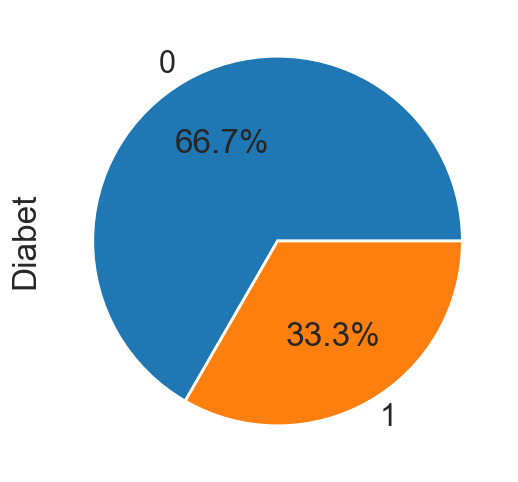

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Diabetic').size().plot(kind='pie',
                                       y = "Diabetic",
                                       label = "Diabet",
                                       autopct='%1.1f%%')

Существует дисбаланс классов в данных 2 к 1.

In [8]:
from sklearn.model_selection import train_test_split


X = df.drop('Diabetic', axis=1)
y = df['Diabetic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test))

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train_scaled)
y_pred_test = dt.predict(X_test_scaled)
print(f'precision score test: {precision_score(y_test, y_pred_test)}')
print(f'recall score test: {recall_score(y_test, y_pred_test)}')
print(f'f1 score train: {f1_score(y_train, y_pred_train)}')
print(f'f1 score test: {f1_score(y_test, y_pred_test)}')

precision score test: 0.2858963466440102
recall score test: 0.673
f1 score train: 0.40527380328114465
f1 score test: 0.4013118664281455


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)
y_train_pred_lg = lg.predict(X_train_scaled)
y_test_pred_lg = lg.predict(X_test_scaled)
print(f'precision score test: {precision_score(y_test, y_pred_test)}')
print(f'recall score test: {recall_score(y_test, y_pred_test)}')
print(f'f1 score train: {f1_score(y_train, y_train_pred_lg)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_lg)}')

precision score test: 0.2858963466440102
recall score test: 0.673
f1 score train: 0.651010376843255
f1 score test: 0.6561822125813449


In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)
y_train_pred_svc = svc.predict(X_train_scaled)
y_test_pred_svc = svc.predict(X_test_scaled)
print(f'precision score test: {precision_score(y_test, y_test_pred_svc)}')
print(f'recall score test: {recall_score(y_test, y_test_pred_svc)}')
print(f'f1 score train: {f1_score(y_train, y_train_pred_svc)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_svc)}')

precision score test: 0.8592910848549946
recall score test: 0.8
f1 score train: 0.8463120020560267
f1 score test: 0.8285862247540134


In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)
y_train_pred_rfc = rfc.predict(X_train_scaled)
y_test_pred_rfc = rfc.predict(X_test_scaled)
print(f'precision score test: {precision_score(y_test, y_test_pred_rfc)}')
print(f'recall score test: {recall_score(y_test, y_test_pred_rfc)}')
print(f'f1 score train: {f1_score(y_train, y_train_pred_rfc)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_rfc)}')

precision score test: 0.0
recall score test: 0.0
f1 score train: 0.0
f1 score test: 0.0


In [18]:
from sklearn.model_selection import cross_val_score

model = SVC()

cv_result = cross_val_score(model, X, y, 
                           scoring='f1_macro', cv=5)

cv_result

array([0.77193289, 0.77016959, 0.77545431, 0.7672253 , 0.77395293])

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('SVC', SVC())])
pipe.fit(X, y)

c = np.linspace(start=0.1, stop=10, num=10)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = {
    "SVC__C": c,
    "SVC__kernel": kernel,
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, param_grid, 
                      scoring='f1_macro', cv=5,)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.88929):
{'SVC__C': np.float64(7.800000000000001), 'SVC__kernel': 'rbf'}


In [21]:
pipe.set_params(SVC__C=search.best_params_['SVC__C'], SVC__kernel=search.best_params_['SVC__kernel'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=np.float64(7.800000000000001)))])

In [25]:
cv_result_pipe = cross_val_score(pipe, X, y, 
                                scoring='f1_macro', cv=5)

print(f"Среднее f1 на тренировочных фолдах: {np.mean(cv_result_pipe).round(3)}")
print(f"Среднее f1 на тестовых фолдах: {np.mean(cv_result_pipe).round(3)}")


Среднее f1 на тренировочных фолдах: 0.889
Среднее f1 на тестовых фолдах: 0.889


Были построены несколько моделей классификации на данных по диагностике даибета:
- дерево решений DecisionTreeClassifier, модель не переобучилась, но качество модели низкая:
    - f1 score train: 0.405;
    - f1 score test: 0.401;
- логистическая регрессии LogisticRegression, модель не переобучилась, качество модели выше, чем качество модели дерева решений:
    - f1 score train: 0.651;
    - f1 score test: 0.656;
- метод опорных векторов SVC, модель не переобучилась, качество модели достаточно хорошее, выше, качества моделей логистической регрессии и дерева решений:
    - f1 score train: 0.846;
    - f1 score test: 0.829;
- случайный лес, модель случайного леса не подходит для решения данной задачи, все показатели качества модели равны 0:
    - f1 score train: 0.0;
    - f1 score test: 0.0.

Самое лучшее качество было получено с помощью метода опорных векторов. Н данной мдели был запущен меод кросс-валидации Cross_val_score, на 5 фолдах были расчитаны средние метрики качества модели: 
- результаты f1 score не нормализованных данных = [0.77193289, 0.77016959, 0.77545431, 0.7672253 , 0.77395293];

На модели опорных векторов был запущен GridSearchCV для поиска оптимальных гиперпараметров модели опорных векторов. По результатов работы метода, были найдены следующие значения гиперпараметров:
- был достигнуто качетсов модели f1 = 0.889
- были найдены лучшие параметры модели опорныхветкоров:
    - параметр С = 7.8;
    - kernel = rbf.

Модель опорных векторов проверена с помощью кросс-валидации на найденных параметрах, получены следущие результаты:
    - f1 score train: 0.889.